<a href="https://colab.research.google.com/github/Arne-Berner/MLHausarbeit/blob/main/UntergangNote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wie ein sinkendes Schiff
Auf der Suche nach dem perfekten Datenset sind mehrere Tage vergangen.
Wobei ich ein Datenset gesucht habe, welches sich gut klassifizieren lässt, einige neue Erkenntnisse hervorbringt und spaßig zu bearbeiten ist.
Das Titanic Datenset hat sich dafür sehr angeboten, auch wenn es schon viel bearbeitet wurde.
Dabei hat es mir leider etwas zu wenig soziale Relevanz oder Forschungscharakter.
Nachdem ich aber zwei Datensets bearbeitet habe, um später herauszufinden, dass sie komplett synthetisiert wurden (oft nicht auf den ersten blick erkennbar) und somit noch weniger Relevanz haben, bin ich doch zu diesem Datenset gekommen.
Der unfertige Stand des letzten Datensets lässt sich auf dem Git finden
## Der Datensatz
Auf Kaggle sind einige Titanic Datensätze zu finden, wie [dieser gut aufbereitete Datensatz](https://www.kaggle.com/datasets/yasserh/titanic-dataset). Dabei kann dieser Datensatz nur synthetisiert sein, da es mehr Passagierdaten gibt, als es auf der Titanic gab. Diesen Datensatz werde ich zum trainieren nutzen.

Zum Testen nutze ich [diesen Datensatz](https://www.kaggle.com/datasets/brendan45774/test-file).

### Mein Ziel mit diesem Datensatz
Ich möchte verschiedene Klassifier testen und mit diesen vorhersagen, ob ein Mensch auf der Titanic überlebt hätte.
# Exploratory Data Analysis (EDA)
In diesem Abschnitt möchte ich die Daten soweit aufbereiten und händisch analysieren, dass sich hypothesen ergeben, um mit ML Methoden weiter machen zu können.
## Imports und Laden des Datensets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette(sns.color_palette('colorblind'))

## Datenset in Google Colab laden
Die eine Möglichkeit in Google Colab daten zu laden ist per Drive
```python
from google.colab import drive

drive.mount('/content/drive')
df =pd.read_csv("drive/My Drive/ColabDrive/TitanicData/titanic.csv")
df.head()
```
Die andere Möglichkeit ist es direkt eine CSV Datei hochzuladen:
[Hier](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/download?datasetVersionNumber=2) der direkte Link zum Download der CSV Datei.
(Vorsicht: Die Datei muss gleich benannt sein)
```python
from google.colab import files
import io

try:
  uploaded = pd.read_csv('titanic.csv')
except:
  files.upload()
  uploaded = pd.read_csv('titanic.csv')
uploaded.head()
```
Ich habe mich aber für die Möglichkeit entschieden, Git zu nutzen, weil ich dort keine Rechte für meine Drive abgeben muss und keine manuelle Eingabe von Nöten ist.

In [ ]:
try:
  test = pd.read_csv('MLHausarbeit/test.csv')
  df = pd.read_csv('MLHausarbeit/training.csv')
except:
  !git clone https://github.com/Arne-Berner/MLHausarbeit.git
  test = pd.read_csv('MLHausarbeit/test.csv')
  df = pd.read_csv('MLHausarbeit/training.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
dataset = pd.concat([df, test], ignore_index=True)
dataset.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace = True)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## Spalten erklärt
Passenger ID - eine fortlaufende ID, welche bei 892 für das testset startet  
Survived - 0: nicht überlebt, 1: überlebt  
Pclass - 1: first class, 2: second class, 3: third class  
Name - Nachname, Titel Vorname  
Sex - Geschlecht  
Age - Alter  
SibSp - Anzahl an Geschwistern auf der Titanic  
Parch - Anzahl an Eltern/Kindern auf der Titanic  
Ticket - Ticketnummer  
Fare - Fahrpreis  
Cabin - Raumnummer   
Embarked - Wo an Board gegangen? S: Southhampton, C: Cork, Q: Queensland

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Cabin     295 non-null    object 
 8   Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 92.2+ KB


## Fehlende Daten
Es ist gut zu erkennen, dass nicht alle Daten erhoben werden konnten. Sowohl beim Alter, als auch bei der Kabinennummer und dem Ticketpreis sind nullwerte zu erwarten. Die fehlenden Daten sind am besten in einem Diagramm zu erkennen.

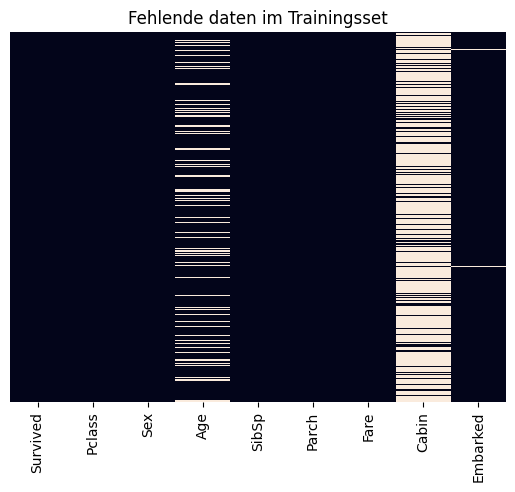

In [ ]:
sns.heatmap(dataset.isnull(),yticklabels = False, cbar = False)
plt.title('Fehlende daten im Trainingsset')
plt.show()

### Werte umwandeln
Das Alter kann noch gut durch Fakewerte aufgefüllt werden, für die Cabins fehlen aber zu viele Daten. Deswegen sollten die Cabins in 1 für Cabin vorhanden und 0 für nicht vorhanden umgewandelt werden.

In [ ]:
# change cabins to the above

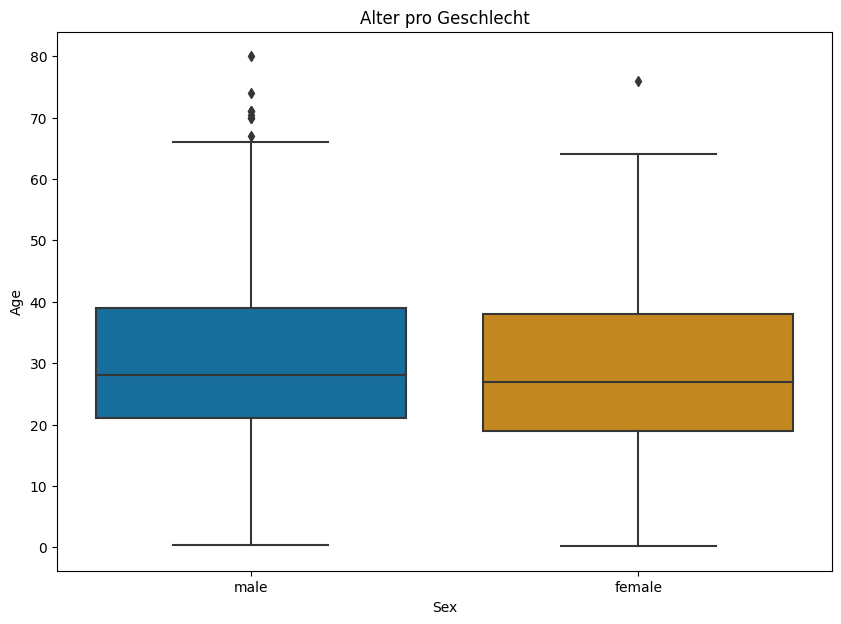

In [ ]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Sex', y = 'Age', data = dataset).set_title('Alter pro Geschlecht')
plt.show()

Hier scheint es keine großen Differenzen zu geben. Es lohnt sich also nicht für männlich und weiblich verschiedene Alter anzugeben.

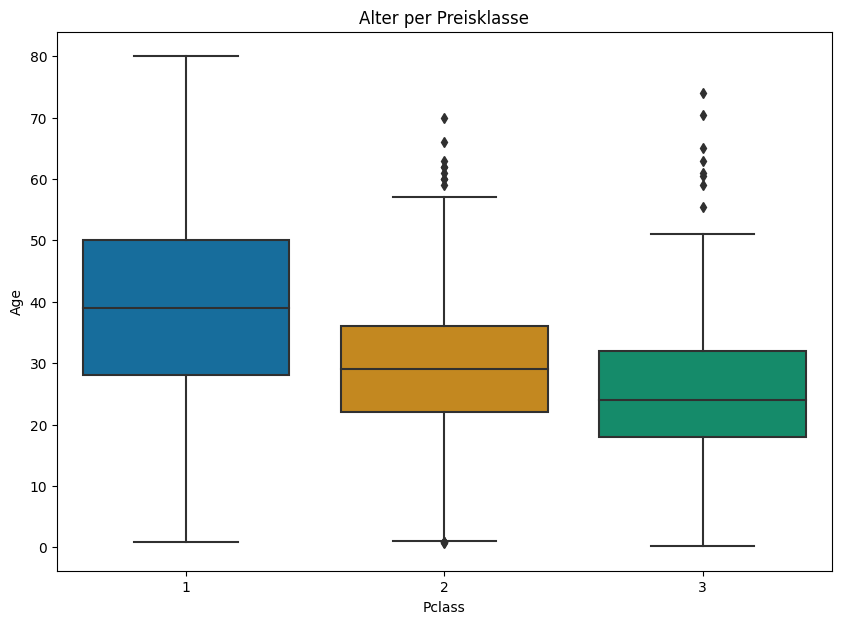

In [ ]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = dataset).set_title('Alter per Preisklasse')
plt.show()

Die Unterschiede sind hier deutlich zu erkennen und es lohnt sich den jeweiligen Klassen andere Alterswerte zu geben.

In [ ]:
# source: https://www.kaggle.com/code/zabihullah18/seaborn-tutorial
def impute_age(cols):
    age = cols[0]
    pClass = cols[1]

    if pd.isnull(age):

        if pClass == 1:
            return 37

        elif pClass == 2:

            return 29

        else:
            return 24

    else:
        return age

dataset['Age']=dataset[['Age','Pclass']].apply(impute_age, axis =1)

In [ ]:
def impute_cabin(cols):
  cabin = cols[0]

  if pd.isnull(cabin):
    return 0
  return 1

dataset['Cabin']= dataset[['Cabin']].apply(impute_cabin, axis=1)

Es gibt zwei Zeilen bei denen Embarked fehlt. Diese müssen noch entfernt werden.

In [ ]:
dataset.dropna(inplace=True)

Zahlen sind meist leichter zu verwerten, als Buchstaben, deswegen ändere ich alle leicht zu quantifizierenden Daten in Integer.

In [ ]:
# source: https://www.kaggle.com/code/zabihullah18/seaborn-tutorial
def impute_sex(cols):
    sex = cols[0]

    if sex == 'male':
      return 0
    return 1

def impute_embarked(cols):
    embarked = cols[0]

    if embarked == 'S':
      return 0
    if embarked == 'C':
      return 1
    return 2


dataset['Sex']=dataset[['Sex']].apply(impute_sex, axis =1)
dataset['Embarked']=dataset[['Embarked']].apply(impute_embarked, axis =1)
dataset.head

<bound method NDFrame.head of       Survived  Pclass  Sex   Age  SibSp  Parch      Fare  Cabin  Embarked
0            0       3    0  22.0      1      0    7.2500      0         0
1            1       1    1  38.0      1      0   71.2833      1         1
2            1       3    1  26.0      0      0    7.9250      0         0
3            1       1    1  35.0      1      0   53.1000      1         0
4            0       3    0  35.0      0      0    8.0500      0         0
...        ...     ...  ...   ...    ...    ...       ...    ...       ...
1304         0       3    0  24.0      0      0    8.0500      0         0
1305         1       1    1  39.0      0      0  108.9000      1         1
1306         0       3    0  38.5      0      0    7.2500      0         0
1307         0       3    0  24.0      0      0    8.0500      0         0
1308         0       3    0  24.0      1      1   22.3583      0         1

[1306 rows x 9 columns]>

## Explorative Data Analysis
### Übersicht

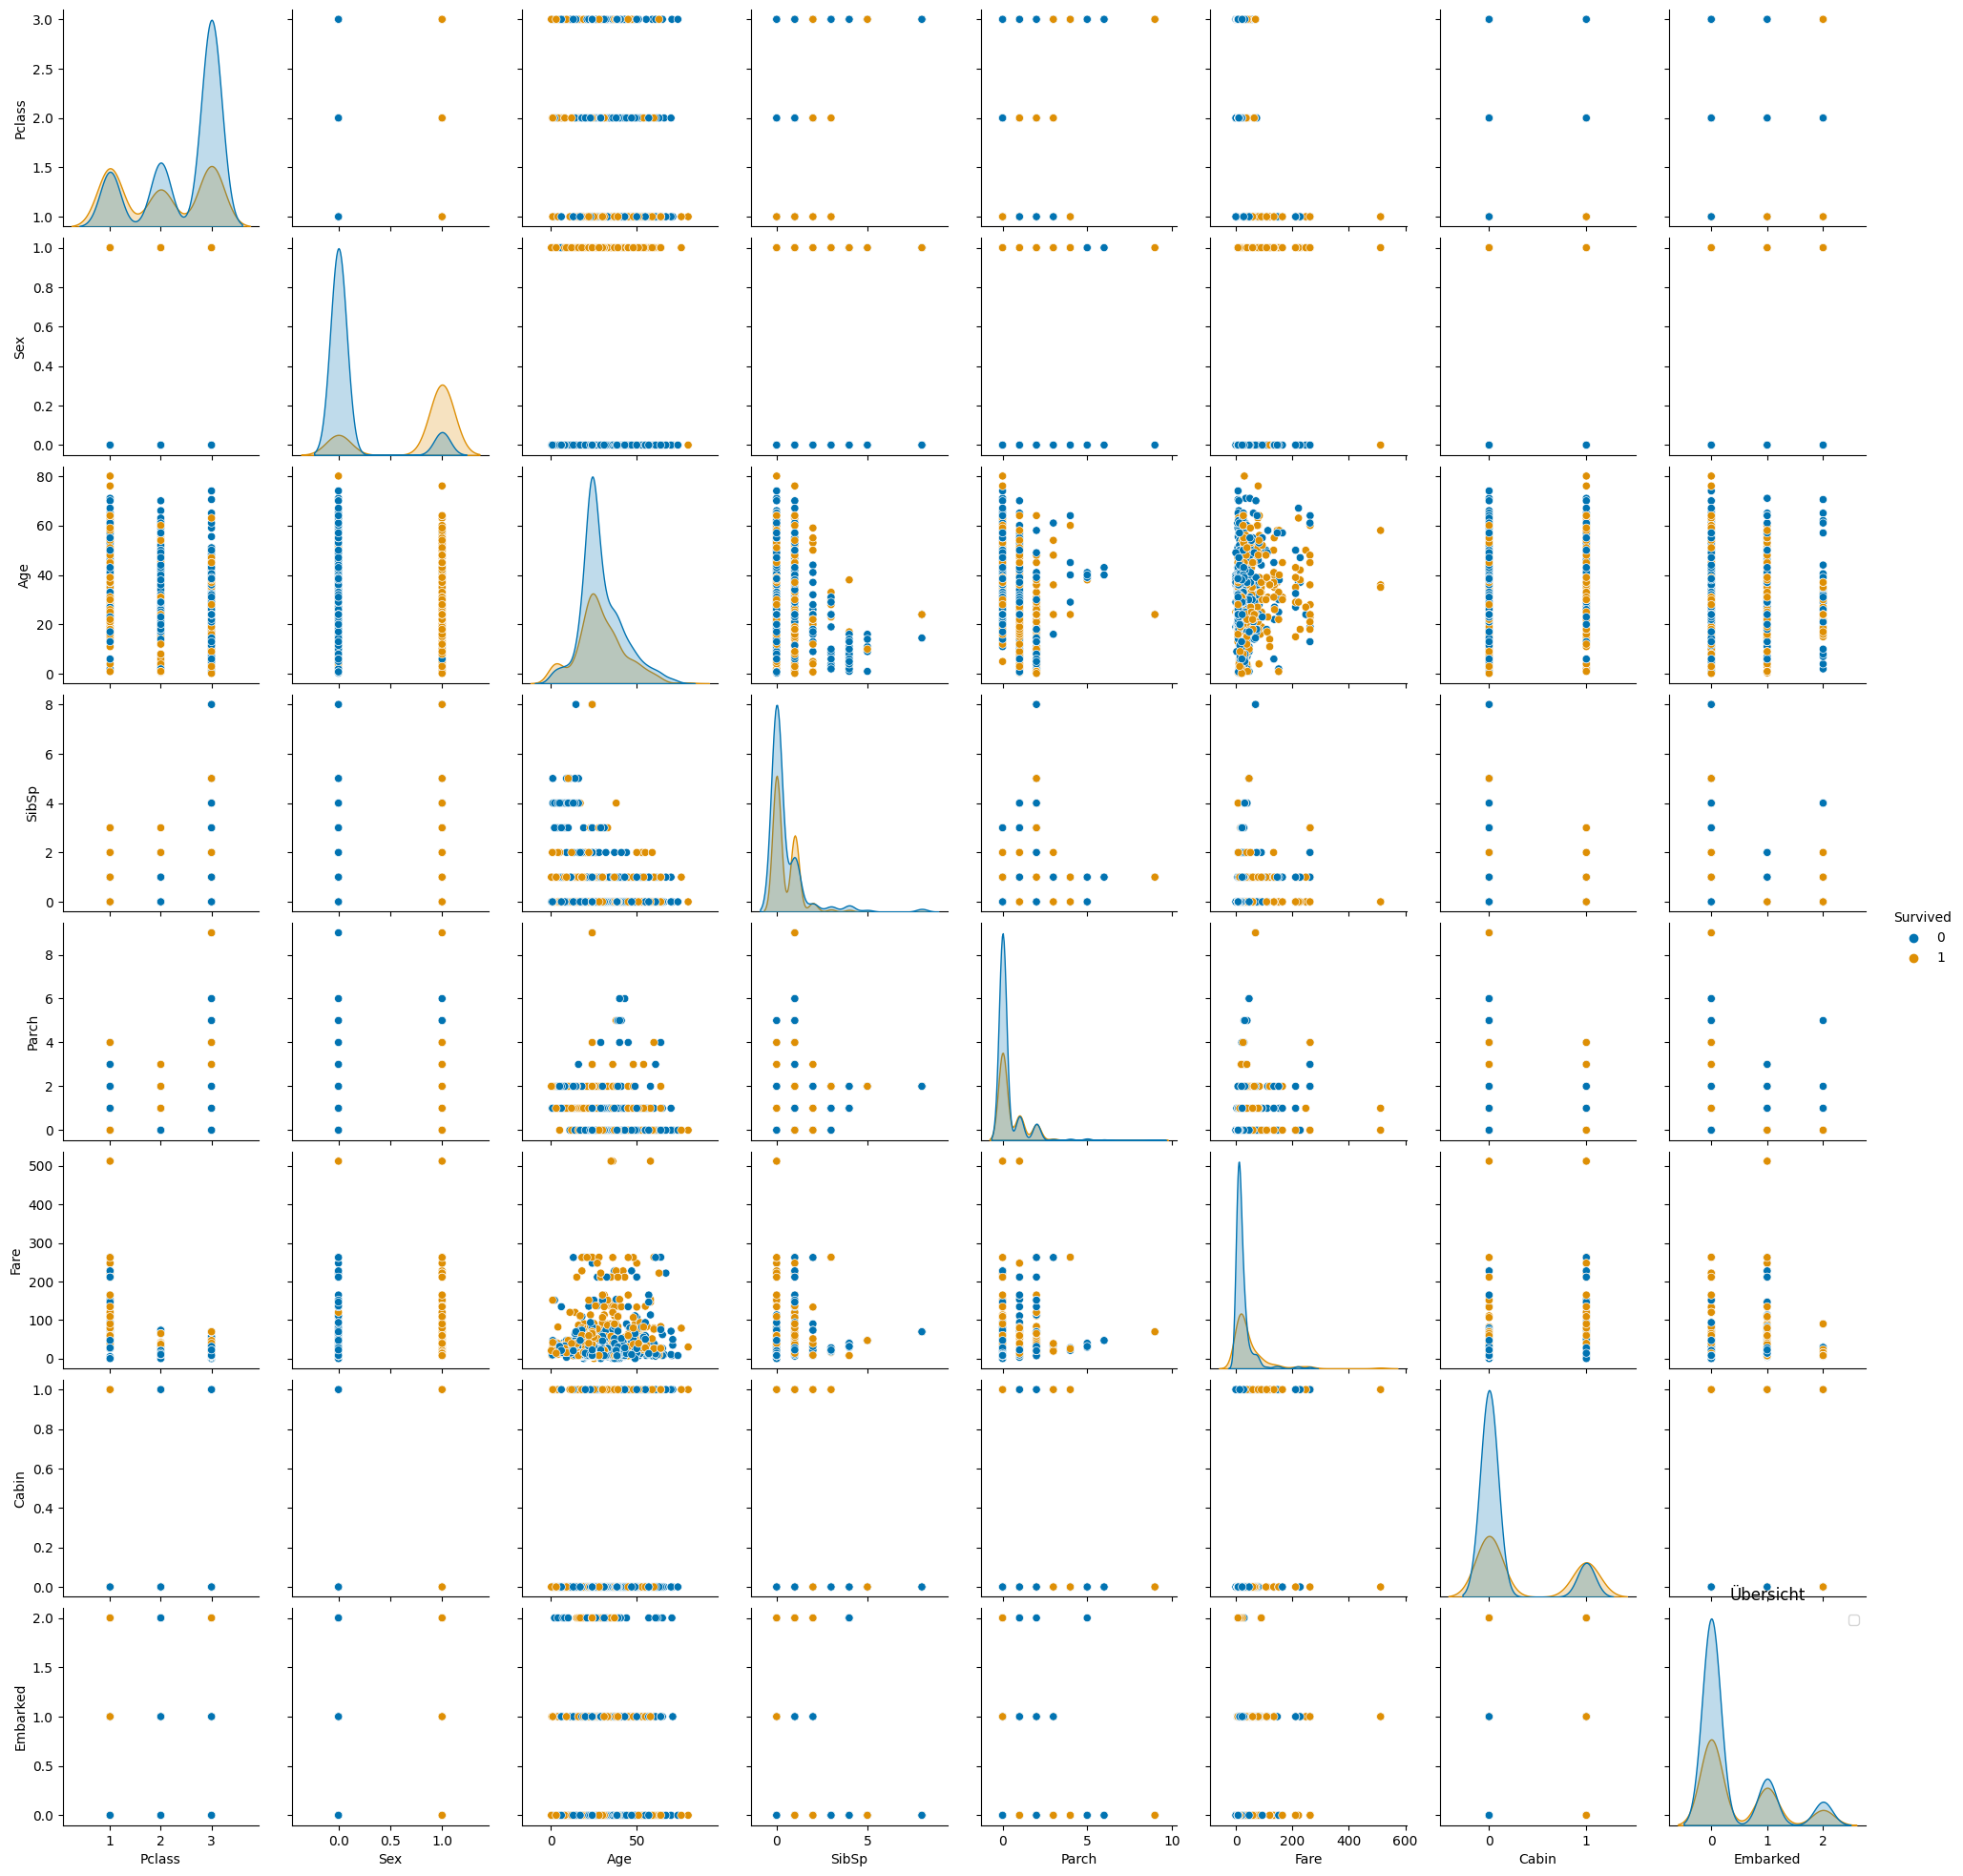

In [ ]:
sns.pairplot(data=dataset, hue='Survived')
plt.title('Übersicht')
plt.legend()
plt.show()

In diesem kleinen Überblick ist schon eine Tendenz zu erkennen.
- Es überleben Leute in der ersten Klasse deutlich häufiger als in der dritten Klasse, damit zusammen hängend auch Menschen die mehr für das Ticket bezahlen
- jüngere Leute haben auch eine höhere Überlebenschance
- Menschen mit 1-3 Geschwistern auf der Titanic überlebten auch häufiger
- genauso Menschen mit ein bis zwei Kindern

### Geschlechterverteilung

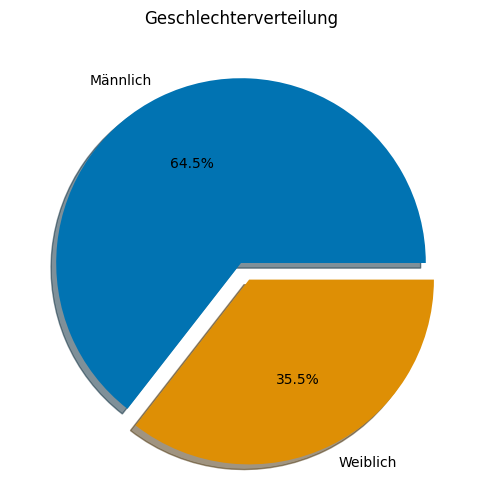

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(dataset['Sex'].value_counts(), labels=['Männlich', 'Weiblich'], autopct='%1.1f%%', explode=[0,0.1], shadow=True)
plt.title('Geschlechterverteilung')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 19.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Sex', ylabel='Age'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 15.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


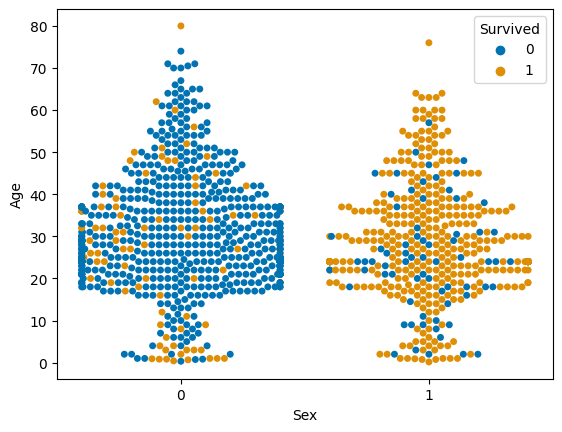

In [ ]:
sns.swarmplot(data=dataset, x='Sex', y='Age', hue='Survived')

Es ist nicht schwierig zu sehen, dass die meisten Männer es nicht überlebt haben. Jedoch scheint dies nicht für jedes alter zu gelten. Bei den Kindern unter 10 gibt es Alterskategorien die komplett überlebt haben. Hier scheint "Frauen und Kinder zuerst auf die Rettungsboote" funktioniert zu haben.

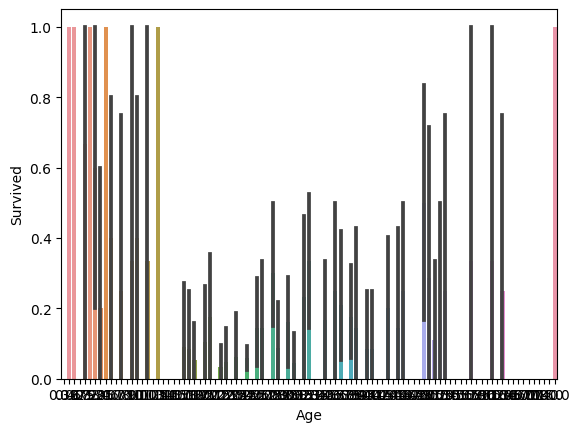

In [ ]:
male_data = dataset[dataset['Sex'] == 0]
sns.barplot(data=male_data, x='Age', y='Survived')
plt.show()

### Altersverteilung

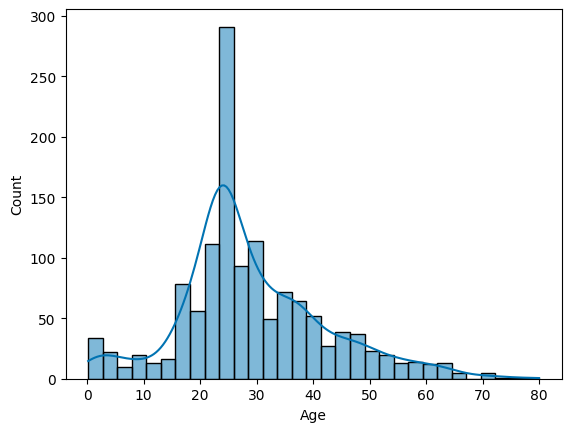

In [ ]:
sns.histplot(dataset['Age'], kde=True)
plt.show()

Die meisten Passagiere sind zwischen 20 und 40 Jahre alt.

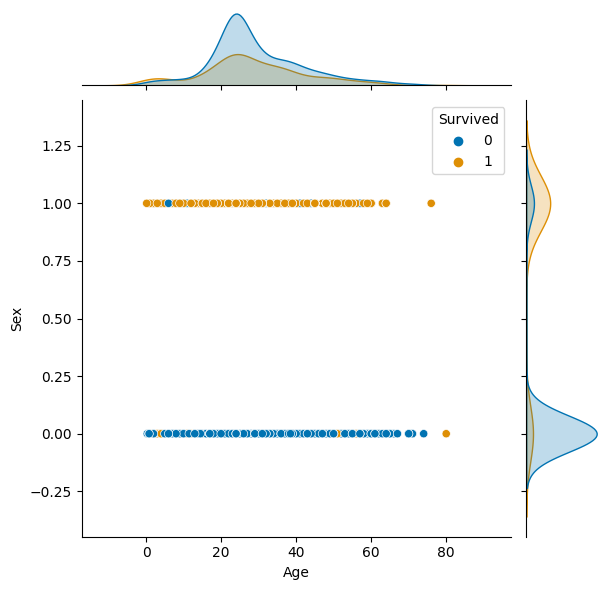

In [ ]:
sns.jointplot(x="Age",y="Sex",data=dataset,hue="Survived")
plt.show()

### Überlebenschance durch Geld

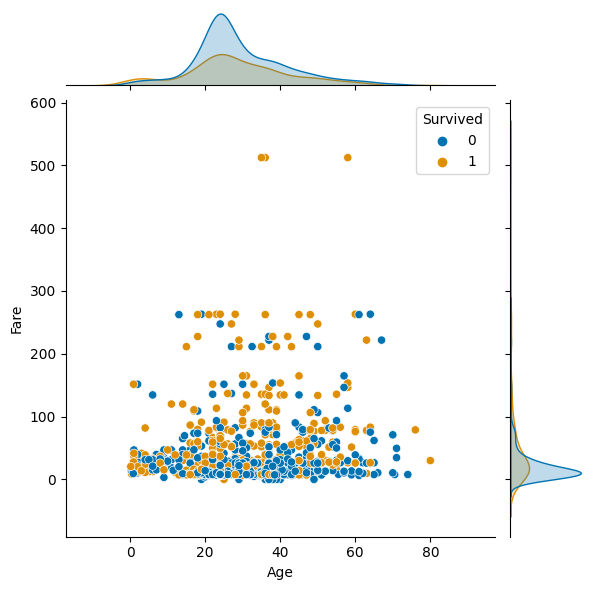

In [ ]:
sns.jointplot(x="Age",y="Fare",data=dataset,hue="Survived")
plt.show()

In [ ]:
dataset.max()

Survived      1.0000
Pclass        3.0000
Sex           1.0000
Age          80.0000
SibSp         8.0000
Parch         9.0000
Fare        512.3292
Cabin         1.0000
Embarked      2.0000
dtype: float64

In [ ]:
dataset.min()

Survived    0.00
Pclass      1.00
Sex         0.00
Age         0.17
SibSp       0.00
Parch       0.00
Fare        0.00
Cabin       0.00
Embarked    0.00
dtype: float64

Etwas verwunderlich, ist dass einige so viel mehr, als andere Bezahlt haben.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 57.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.4% of the points cannot be place

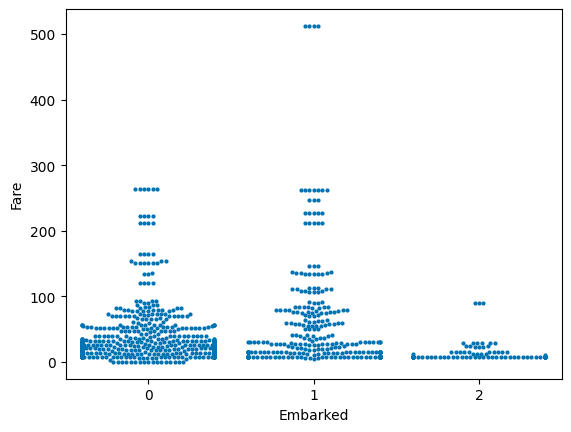

In [ ]:
sns.swarmplot(x="Embarked", y="Fare", data=dataset, size=3)
plt.show()

Es wäre jetzt zu erwarten, dass 1 von embarked die erste Station war und somit die längste Reise, jedoch ist 1 Cork und somit die zweite Station der Titanic. Die Variierenden Preise lassen insgesamt eher auf verschiedene Qualitätsstufen innerhalb der Preisklassen schließen.

### Korrelation zwischen werten

<ipython-input-126-6522c2b4e5f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


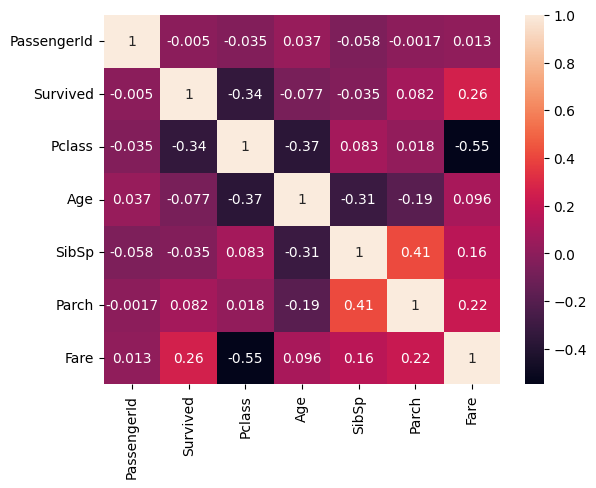

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

Nicht überraschend ist die hohe korrelation zwischen Fahrtpreis und Preisklasse, oder Kinderzahl und Geschwister, jedoch fällt auch hier auf, das eine starke Korrelation zwischen Fahrtpreis und Überlebenschance besteht.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1306 non-null   int64  
 1   Pclass    1306 non-null   int64  
 2   Sex       1306 non-null   int64  
 3   Age       1306 non-null   float64
 4   SibSp     1306 non-null   int64  
 5   Parch     1306 non-null   int64  
 6   Fare      1306 non-null   float64
 7   Cabin     1306 non-null   int64  
 8   Embarked  1306 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 102.0 KB


# Trainieren
Zum Trainieren werde ich das Datenset wieder in zwei Teile splitten und den Ergebnis-Anteil vom Trainier-Anteil trennen.

In [ ]:
X = dataset.drop('Survived', axis=1)
y = dataset['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25, random_state=42)
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1176,3,0,36.0,0,0,7.2500,0,0
515,1,0,47.0,0,0,34.0208,1,0
846,3,0,24.0,8,2,69.5500,0,0
857,1,0,51.0,0,0,26.5500,1,0
1304,3,0,24.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
712,1,0,48.0,1,0,52.0000,1,0
763,1,1,36.0,1,2,120.0000,1,0
495,3,0,24.0,0,0,14.4583,0,1
669,1,1,37.0,1,0,52.0000,1,0


In [ ]:
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
def show_matrix(matrix, trainingscore, testscore):
  print("------------------------------------------------------------")
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in
                  matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      matrix.flatten()/np.sum(matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')
  plt.title("Confusion Matrix mit Label, absoluten Zahlen und Prozent")
  tp = matrix[0][0]
  fp = matrix[0][1]
  fn = matrix[1][0]
  tn = matrix[1][1]
  trainingText = "Trainingset Score: {:0.2f}\n".format(trainingscore)
  testText = "Testset Score: {:0.2f}\n".format(testscore)
  genauigkeit = "Genauigkeit: {:0.2f}\n".format((tp+tn)/(tp+fp+fn+tn))
  sensitivitat = "Sensitivität Score: {:0.2f}\n".format((tp/(tp+fn)))
  spezifizitat = "Spezifität Score: {:0.2f}\n".format(tn/(fp+tn))
  plt.xlabel(trainingText + testText + genauigkeit + sensitivitat + spezifizitat)
  plt.show()
  print("------------------------------------------------------------")

# https://stackoverflow.com/questions/28200786/how-to-plot-scikit-learn-classification-report
# .iloc[:-1, :] to exclude support
def show_clas_report(report):
  print("------------------------------------------------------------")
  plt.title("Classification Report")
  sns.heatmap(pd.DataFrame(report).iloc[:-1,:].T, annot=True, cmap=sns.cm.rocket_r)
  plt.show()
  print("------------------------------------------------------------")

Kurze Erinnerung, was welcher Wert im Classification Report ist:
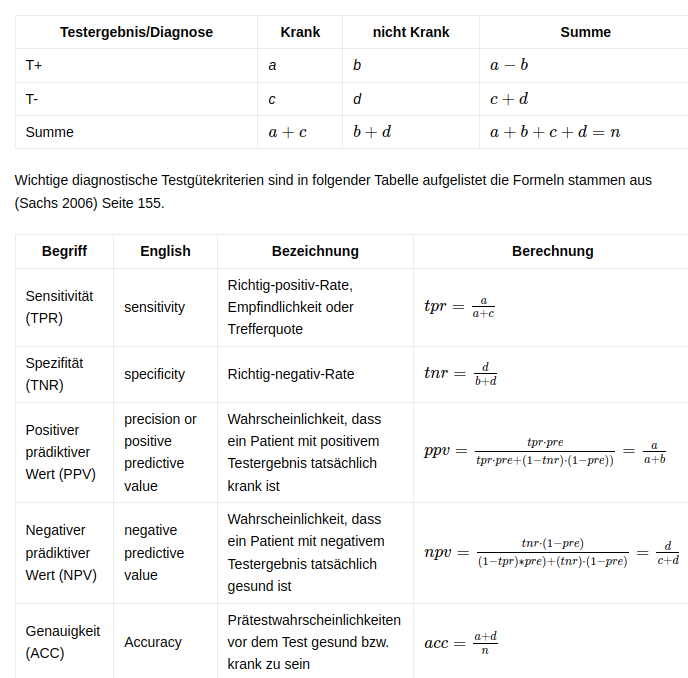

Außerdem ist recall tp/(tp+fn) und F-Beta ist der Mittelwert zwischen recall und precision.

## Decision Tree und Random Forest

------------------------------------------------------------


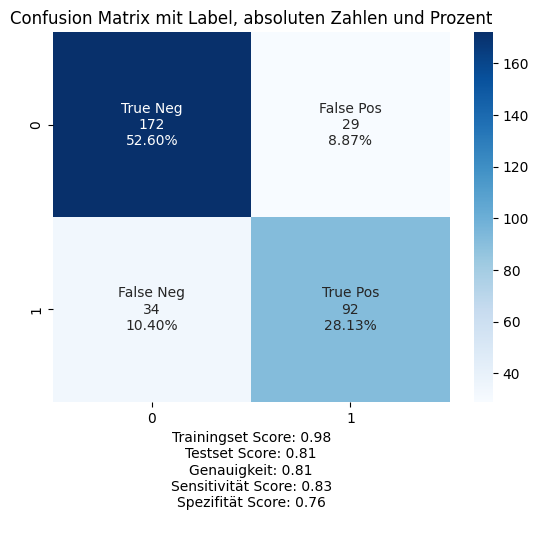

------------------------------------------------------------
------------------------------------------------------------


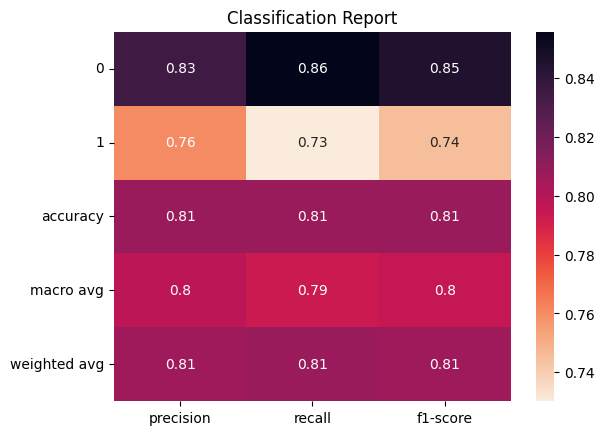

------------------------------------------------------------


array([[172,  29],
       [ 34,  92]])

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
trainingScore = clf.score(X_train, y_train)
testScore = clf.score(X_test, y_test)


show_matrix(cf_matrix, trainingScore, testScore)
report = classification_report(y_test,y_pred, output_dict=True)
show_clas_report(report)
cf_matrix

In [ ]:
# tree with better hyperparameters
# https://www.youtube.com/watch?v=TvB_3jVIHhg
search_space = {
    "max_depth": [None, 3, 10, 100],
    "criterion": ["gini", "entropy"],
    "min_samples_split" : [2, 4, 10,20],
    "min_samples_leaf" : [1, 5, 10,20],
    "min_samples_split" : [2, 4, 10, 50, 100],
}

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = tree.DecisionTreeClassifier()
# r2 hatte bessere Resultate als accuracy
# cv = 5, war schlechter als 50, 500 wurde nicht fertig und 10 waren so gut wie 50
GS = GridSearchCV(estimator = clf, param_grid=search_space, scoring = ["r2", "accuracy"], refit="accuracy", cv= 10, verbose=3)
GS = GS.fit(X_train, y_train)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits
[CV 1/10] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; accuracy: (test=0.786) r2: (test=0.078) total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; accuracy: (test=0.806) r2: (test=0.166) total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; accuracy: (test=0.765) r2: (test=-0.010) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; accuracy: (test=0.827) r2: (test=0.262) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; accuracy: (test=0.776) r2: (test=0.045) total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; accuracy: (test=0.888) r2: (test=0.522) total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=None, min_samples_

------------------------------------------------------------


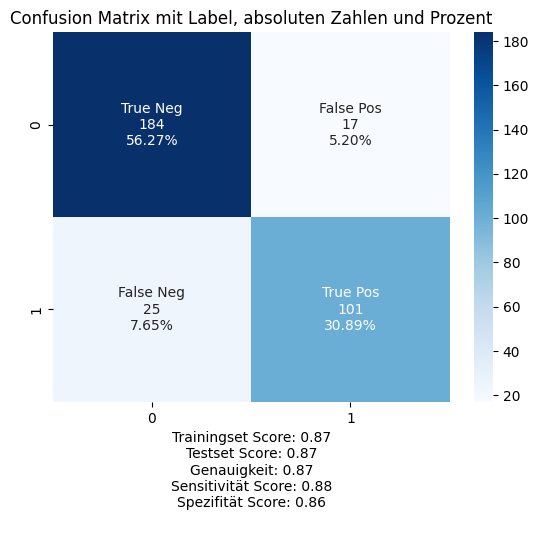

------------------------------------------------------------
------------------------------------------------------------


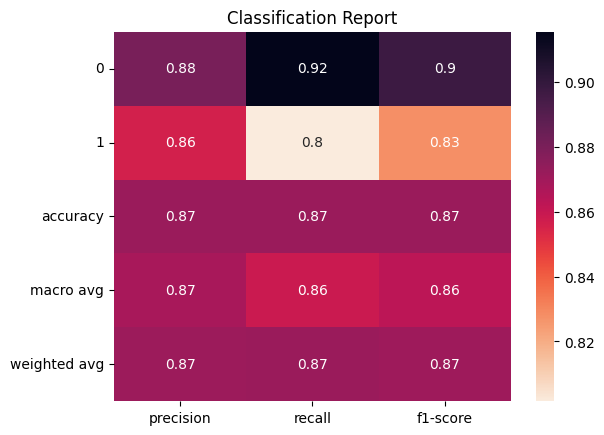

------------------------------------------------------------


In [ ]:
y_pred = GS.predict(X_test)
trainingScore = GS.score(X_train, y_train)
testScore = GS.score(X_test, y_test)
cf_matrix = confusion_matrix(y_test, y_pred)
show_matrix(cf_matrix, trainingScore, testScore)
report = classification_report(y_test,y_pred, output_dict=True)
show_clas_report(report)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
# rf_ent.fit(X_train, y_train)
# y_pred_rfe = rf_ent.predict(X_test)

# print("Training set score: {:.2f}".format(rf_ent.score(X_train, y_train)))
# print("Test set score: {:.2f}".format(rf_ent.score(X_test, y_test)))
# print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_rfe)))
# print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_rfe))
# print("Classification_Report: \n",classification_report(y_test,y_pred_rfe))